In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('../Data/raw/subset_data.csv')

# <b>Understand Data</b>

In [5]:
data.shape

(10000, 9)

In [6]:
data.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    10000 non-null  object 
 1   user_id      10000 non-null  object 
 2   business_id  10000 non-null  object 
 3   stars        10000 non-null  float64
 4   useful       10000 non-null  int64  
 5   funny        10000 non-null  int64  
 6   cool         10000 non-null  int64  
 7   text         10000 non-null  object 
 8   date         10000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 703.3+ KB


In [8]:
data.describe()

,stars,useful,funny,cool
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.854300,0.889100,0.246500,0.335500
std,1.346719,2.092329,0.885221,1.051023
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000
max,5.000000,91.000000,26.000000,44.000000


In [9]:
data.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

NO Data Cleaning

In [10]:
dup = data.duplicated().sum()
dup

0

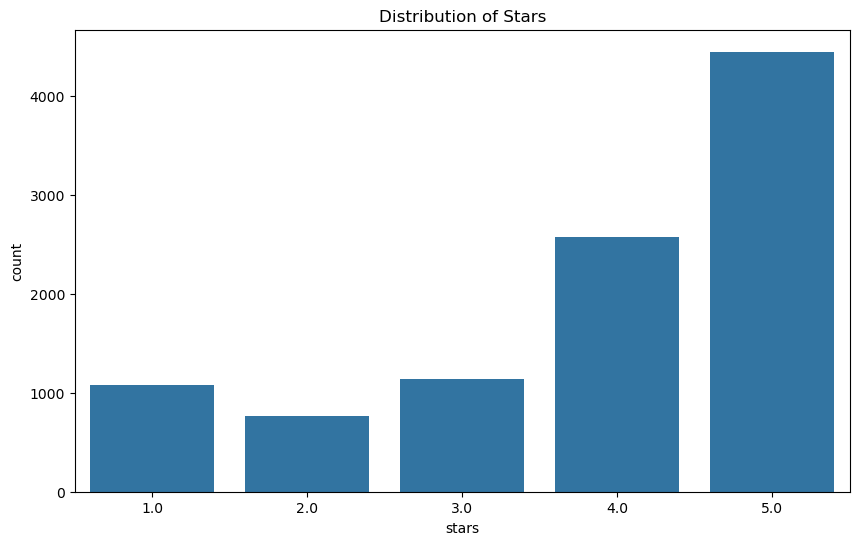

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='stars', data=data)
plt.title('Distribution of Stars')
plt.show()

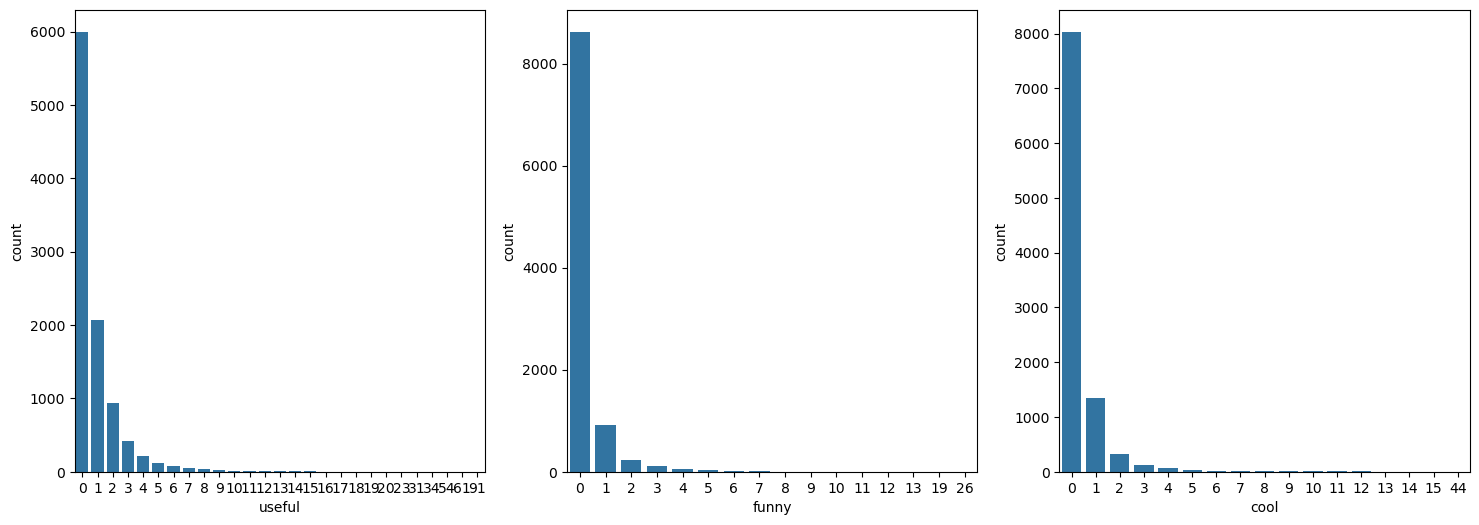

In [12]:
# Plot distribution of useful, funny, cool
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.countplot(x='useful', data=data, ax=axes[0])
sns.countplot(x='funny', data=data, ax=axes[1])
sns.countplot(x='cool', data=data, ax=axes[2])
plt.show()

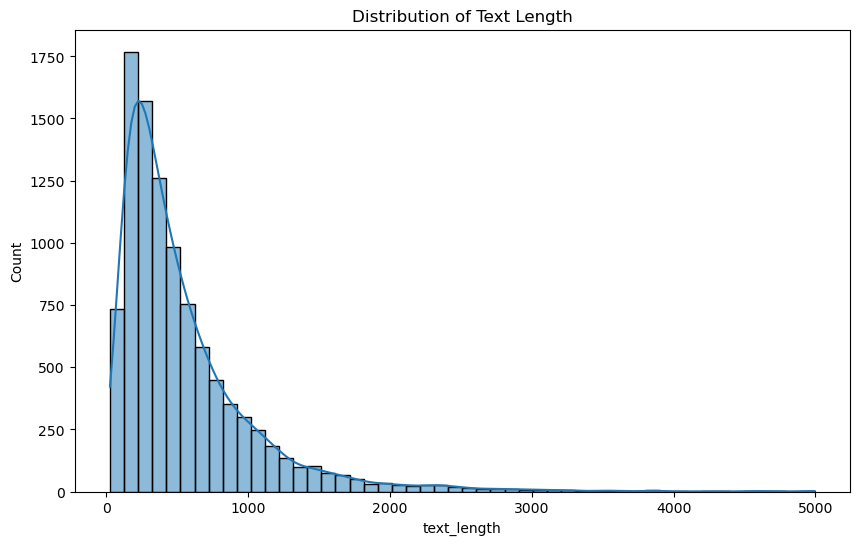

In [17]:
# Plot distribution of text length
data['text_length'] = data['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Length')
plt.show()


Data Preprocessing

In [19]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    text = text.strip()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

data['cleaned_text'] = data['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Feature Engineering

In [21]:
data['word_count'] = data['cleaned_text'].apply(lambda x: len(x.split()))

Label Encoding

In [23]:
data['label'] = data['stars'].apply(lambda x: 1 if x >= 4 else 0)

Classical Machine Learning Models

In [ ]:
from sklearn.feature_extraction.text import TfidataVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidataVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_text']).toarray()
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.8765
              precision    recall  f1-score   support

           0       0.88      0.67      0.76       590
           1       0.88      0.96      0.92      1410

    accuracy                           0.88      2000
   macro avg       0.88      0.82      0.84      2000
weighted avg       0.88      0.88      0.87      2000



Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.855
              precision    recall  f1-score   support

           0       0.87      0.60      0.71       590
           1       0.85      0.96      0.90      1410

    accuracy                           0.85      2000
   macro avg       0.86      0.78      0.81      2000
weighted avg       0.86      0.85      0.85      2000



Transformer-based Models

RoBERTa

In [34]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import torch

# Load tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base')

# Tokenize the data
def tokenize_function(examples):
    return tokenizer(examples['cleaned_text'], padding="max_length", truncation=True)

train_dataset = data.sample(frac=0.8, random_state=42)
test_dataset = data.drop(train_dataset.index)

train_dataset = train_dataset.reset_index(drop=True)
test_dataset = test_dataset.reset_index(drop=True)

train_encodings = tokenizer(train_dataset['cleaned_text'].tolist(), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(test_dataset['cleaned_text'].tolist(), truncation=True, padding=True, max_length=512)

train_labels = train_dataset['label'].tolist()
test_labels = test_dataset['label'].tolist()

# Create PyTorch dataset
class ReviewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ReviewsDataset(train_encodings, train_labels)
test_dataset = ReviewsDataset(test_encodings, test_labels)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

# Define trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Train the model
trainer.train()

# Evaluate the model
trainer.evaluate()


ModuleNotFoundError: No module named 'torch'

C:\Users\abdel\AppData\Local\Temp\ipykernel_2608\324021182.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[feature], palette='viridis')
C:\Users\abdel\AppData\Local\Temp\ipykernel_2608\324021182.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[feature], palette='viridis')
C:\Users\abdel\AppData\Local\Temp\ipykernel_2608\324021182.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[feature], palette='viridis')
C:\Users\abdel\AppData\Local\Temp\ipykernel_2608\324021182.py:6: FutureWarning: 

Passing `palette` withou

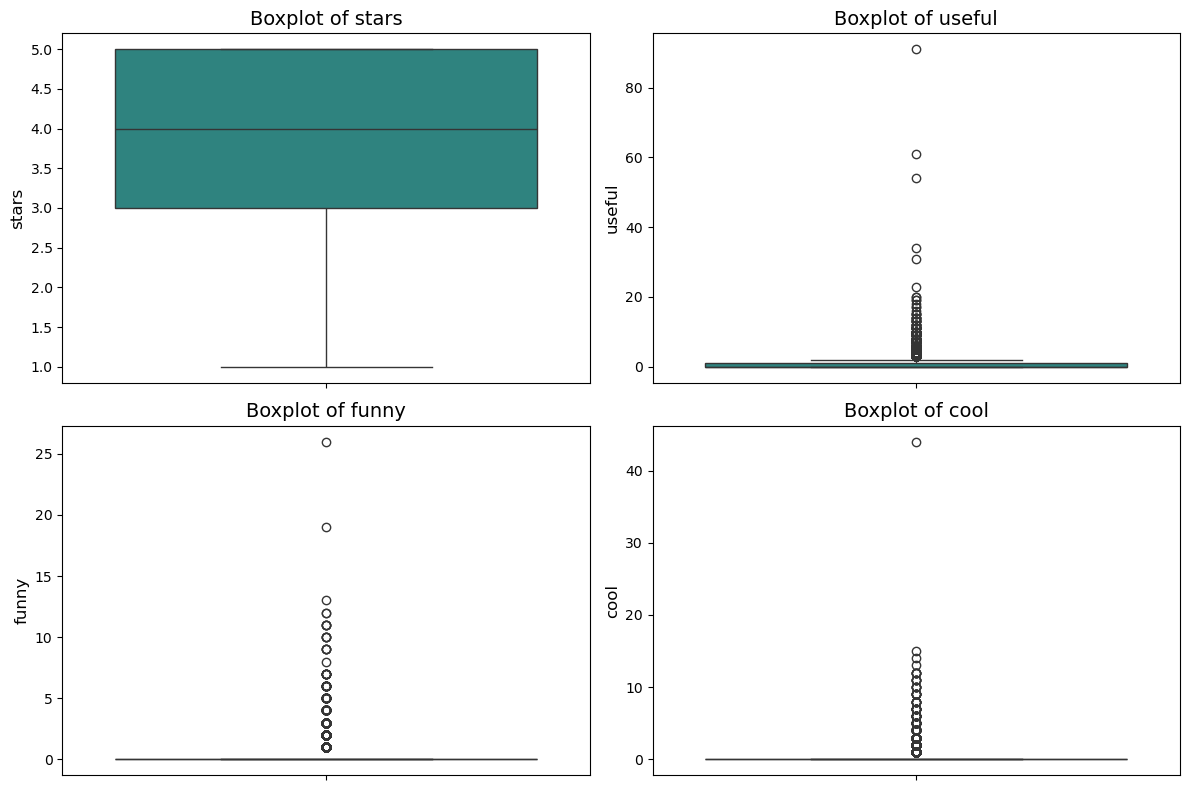

In [36]:
numerical_features = ['stars', 'useful', 'funny', 'cool']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)  # Adjust subplot grid as needed
    sns.boxplot(y=data[feature], palette='viridis')
    plt.title(f'Boxplot of {feature}', fontsize=14)
    plt.ylabel(feature, fontsize=12)
    plt.tight_layout()
plt.show()
